# Setup

Guiding Research Questions

*   **Application question** (*Speed is the priority*): Which config should I use for my BFS kernel?  For similar BW requirements (Reads and writes per second), what other configs might I consider?

*  **System Question** (*Efficiency is priority*): When should I consider “switching” to RRAM?

*  **Technology Questions** (*Reliability/Lifetime is the priority*): Identify “killer use case” for my technology, Identify what the key limitations are

With these questions in mind, we first gathered the necessary data by running NVMExplorer on the following configuration:

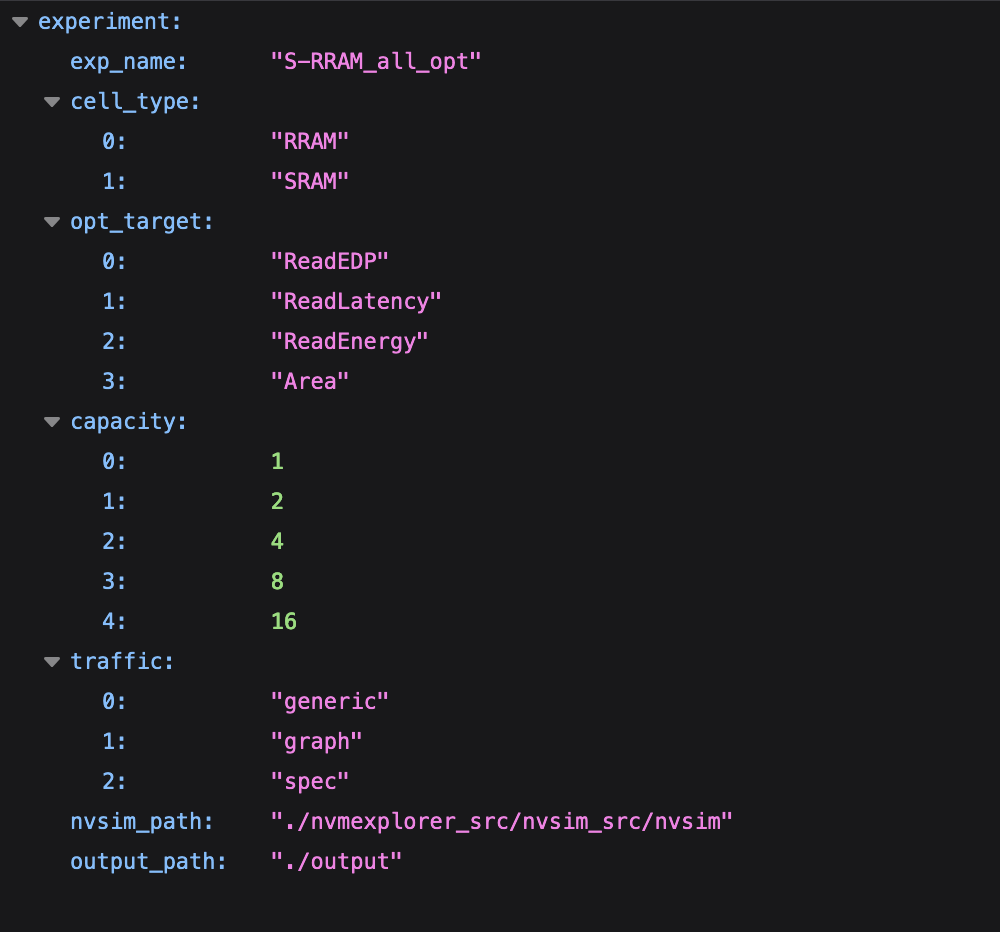





In [ ]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual, IntRangeSlider
import ipywidgets as widgets
from math import log10, floor, ceil
import re
import copy

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the data
SRAMdf_path = '/content/drive/MyDrive/Beam_Team/data/SRAM_1BPC-combined.csv'
RRAMdf_path = '/content/drive/MyDrive/Beam_Team/data/RRAM_1BPC-combined.csv'

SRAMdf = pd.read_csv(SRAMdf_path)
RRAMdf = pd.read_csv(RRAMdf_path)

#Make combined frame
dfs = pd.concat([SRAMdf, RRAMdf])

#Key columns:
  #MemCellType: RRAM vs SRAM
  #Capacity (MB): 1, 2, 4, 8, 16 MB trials
  #Optimization Target: ReadEnergy, ReadLatency, Area, ReadEDP

#Take a look at our combined frame
dfs.head()


array([' ReadEnergy', ' ReadLatency', ' Area', ' ReadEDP'], dtype=object)

# Application Question: Speed

Our Game-Plan


1.   Setup

Start by importing the data with the optimization target read latency
Figure out organization/structure we want to use to organize the various dataframes. Separate into four data frames comparing the two technologies, 1 dataframe for each memory capacity?
Get to know the data: figure out the columns of the dfs, generate some summary statistics

2.  Q1a: Which config should I use for my BFS kernel?

Filter out results from traffic experiments - Facebook and Wikipedia BFS
For each technology, for the BFS traffic pattern, we’ll make a graph of that tech with each optimization target for every memory capacity, with each graph showing the configuration’s read latency, and then compare the read latency’s of these graphs (between graphs of the same memory capacity) to find the optimal configuration at each memory capacity.  Graph opt target for each memory capacity for both traffic patterns above. Then the config to use @ each memory capacity is the one with the fastest read latency

3.  Q1b: For similar BW(bandwidth) requirements(reads/writes per second), what other configs might I consider?

Look for similar reads/writes per second with BFS(same ratio of reads/writes?), find best config for that set of data. Look through all benchmarks that have similar ratio of read writes compared to the “best” at each memory capacity





### Answering Question 1a: Which Configuration should I use for my BFS Kernel?

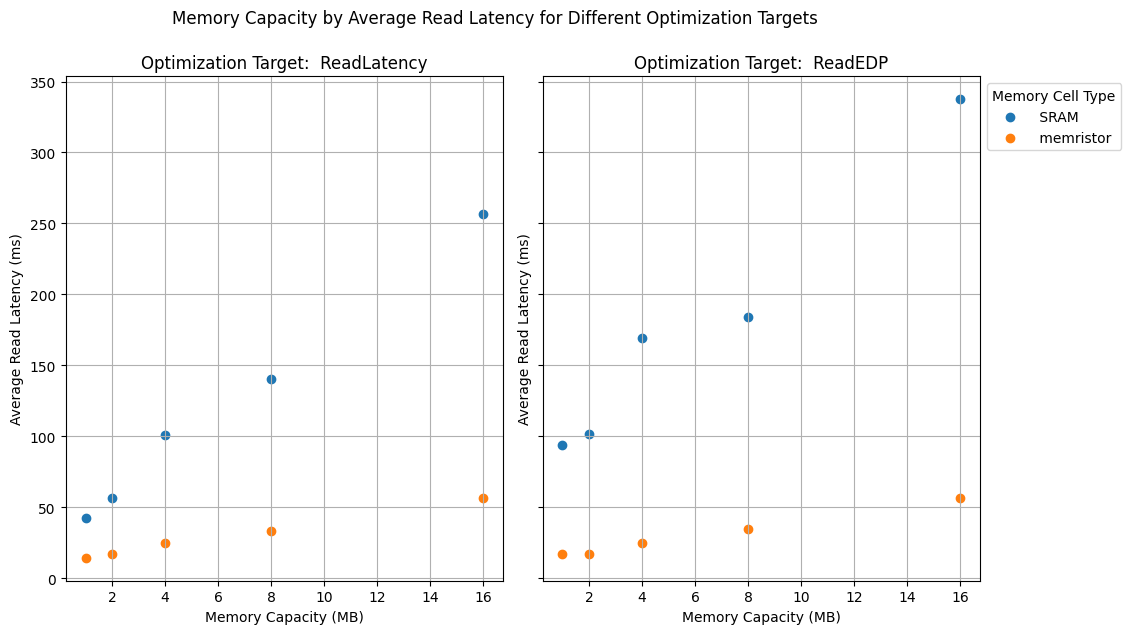

In [ ]:
#Insert code for Anthony's scatter plot #1 (I put my code but feel free to switch it out I just wanted to make sure all the packages were working)

filtered_values = dfs[dfs['Benchmark Name'].str.contains('bfs', case=False, na=False)]['Benchmark Name'].unique()
'''
'Facebook--BFS8MB' 'Wikipedia--BFS8MB'
'''

#We'll be evaluating by Read latency - whats the diff btw the diff read latency metrics included in the table?
dfs['Total Read Latency (ms)'].unique()
'''
array([-0.00000000e+00, -1.00000000e-06, -2.00000000e-06, ...,
        6.19898746e+00,  9.42671928e+00,  9.26304012e+00])
'''

#Filter out negative values - these are the pessemistic predictions?
dfs = dfs[dfs['Total Read Latency (ms)'] >= 0]

dfs['Total Read Latency (ms)'].unique()
'''
array([-0.00000000e+00,  1.18410000e-05,  2.36820000e-05, ...,
        6.19898746e+00,  9.42671928e+00,  9.26304012e+00])
'''

#filter for just two bfs benchmarks
benchmark_filter = ['Facebook--BFS8MB','Wikipedia--BFS8MB']
bfs_df= dfs[dfs['Benchmark Name'].isin(benchmark_filter)]

#Group by mem cell type, optimization target, and memory capacity
bfsgrouped_df = bfs_df.groupby(['MemCellType','OptimizationTarget', 'Capacity (MB)'])['Total Read Latency (ms)'].mean().reset_index()


# Assuming bfsgrouped_df is already defined
# Get unique optimization targets
optimization_targets = [' ReadLatency', ' ReadEDP']

# Create a figure for the plots
num_targets = len(optimization_targets)
fig, axes = plt.subplots(1, num_targets, figsize=(5 * num_targets, 6), sharey=True)

# Loop through each optimization target and create a scatter plot
for ax, target in zip(axes, optimization_targets):
    # Loop through each MemCellType and plot
    for memcell in bfsgrouped_df['MemCellType'].unique():
        # Filter the subset for the current MemCellType and optimization target
        subset = bfsgrouped_df[
            (bfsgrouped_df['MemCellType'] == memcell) &
            (bfsgrouped_df['OptimizationTarget'] == target)
        ]

        # Plot only if the subset is not empty
        if not subset.empty:
            ax.scatter(subset['Capacity (MB)'], subset['Total Read Latency (ms)'],
                       label=memcell)


    # Add labels and title for each subplot
    ax.set_title(f'Optimization Target: {target}')
    ax.set_xlabel('Memory Capacity (MB)')
    ax.set_ylabel('Average Read Latency (ms)')
    ax.grid(True)

# Adjust layout and add a legend to the last subplot
plt.tight_layout()
plt.suptitle('Memory Capacity by Average Read Latency for Different Optimization Targets', y=1.05)
plt.legend(title='Memory Cell Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
#Insert code for Anthony's scatter plot #2 (No Area)

### Answering Question 1b: For similar BW requirements, what other configs might I consider?

In [ ]:
#Insert Jonah's code for filtering similar bandwith requirements and graphing the average performance of these alt benchmarks for each capacity/tech/opt target

Next Steps for Q1


*   Make the data visualizations more interactive, for example making it so that when the user hover's their mouse over a value on a graph, the read latency of that data point pops up
*   How can we ensure that our visualizations scale for larger volumes of data?



# Systems Question: Efficiency

Our Game Plan

In [ ]:
#Ema's code

# Tech Question: Lifetime

How do we do endurance?